### Clustering Analysis

In [ ]:
import pandas as pd
import numpy as np
import ast # To safely evaluate the string representation of the dictionary

# Load your summary file
summary_df = pd.read_csv('E:\ARooSH\CS\ML\RedCluster\cluster_results\grid_search_summary.csv')

df_pain_points = pd.read_csv('csvs/reddit_gpt5_pain_points.csv')
total_points = len(df_pain_points)


# --- 2. Calculate Enhanced Metrics ---
cluster_size_stds = []
noise_ratios = []

for index, row in summary_df.iterrows():
    # --- Calculate Cluster Size Std Dev ---
    cluster_sizes_dict = ast.literal_eval(row['cluster_sizes'])
    real_cluster_sizes = [size for label, size in cluster_sizes_dict.items() if label != -1]
    if len(real_cluster_sizes) > 0:
        std_dev = np.std(real_cluster_sizes)
        cluster_size_stds.append(std_dev)
    else:
        cluster_size_stds.append(0)
    
    # --- Calculate Noise Ratio ---
    noise_points = row['noise_points']
    ratio = noise_points / total_points
    noise_ratios.append(ratio)

# Add the new metrics to your DataFrame
summary_df['cluster_size_std'] = cluster_size_stds
summary_df['noise_ratio'] = noise_ratios


# --- 3. Re-evaluate the Results with All Metrics ---
# Sort to find the best balance: high cluster count, low noise, and low std dev
final_sorted_summary = summary_df.sort_values(
    by=['num_clusters', 'noise_ratio', 'cluster_size_std'], 
    ascending=[False, True, True]
)

print("--- Enhanced Summary with Cluster Balance and Noise Ratio ---")
# Display the most relevant columns for your decision
display(final_sorted_summary[[
    'experiment_name', 
    'num_clusters', 
    'noise_points', 
    'noise_ratio', 
    'cluster_size_std',
    'cluster_sizes'
]])

<>:6: SyntaxWarning: invalid escape sequence '\A'
<>:6: SyntaxWarning: invalid escape sequence '\A'
C:\Users\HP\AppData\Local\Temp\ipykernel_24040\503775231.py:6: SyntaxWarning: invalid escape sequence '\A'
  summary_df = pd.read_csv('E:\ARooSH\CS\ML\RedCluster\cluster_results\grid_search_summary.csv')


--- Enhanced Summary with Cluster Balance and Noise Ratio ---


,experiment_name,num_clusters,noise_points,noise_ratio,cluster_size_std,cluster_sizes
5,bge-large-en-v1.5__umap__hdbscan,64,964,0.372921,17.364704,"{-1: 964, 0: 10, 1: 25, 2: 11, 3: 14, 4: 110, ..."
11,all-MiniLM-L6-v2__umap__hdbscan,60,867,0.335397,25.911366,"{-1: 867, 0: 14, 1: 22, 2: 15, 3: 25, 4: 10, 5..."
7,all-MiniLM-L6-v2__pca__dbscan,15,2428,0.939265,9.756138,"{-1: 2428, 0: 21, 1: 44, 2: 9, 3: 7, 4: 8, 5: ..."
0,bge-large-en-v1.5__pca__kmeans,8,0,0.000000,46.755849,"{0: 405, 1: 278, 2: 292, 3: 311, 4: 356, 5: 37..."
3,bge-large-en-v1.5__umap__kmeans,8,0,0.000000,96.027909,"{0: 357, 1: 372, 2: 349, 3: 310, 4: 115, 5: 46..."
9,all-MiniLM-L6-v2__umap__kmeans,8,0,0.000000,122.987233,"{0: 572, 1: 351, 2: 295, 3: 120, 4: 212, 5: 37..."
6,all-MiniLM-L6-v2__pca__kmeans,8,0,0.000000,169.904707,"{0: 576, 1: 568, 2: 351, 3: 100, 4: 209, 5: 21..."
10,all-MiniLM-L6-v2__umap__dbscan,8,73,0.028240,806.217402,"{-1: 73, 0: 2447, 1: 14, 2: 7, 3: 6, 4: 6, 5: ..."
4,bge-large-en-v1.5__umap__dbscan,7,79,0.030561,850.402762,"{-1: 79, 0: 2441, 1: 25, 2: 10, 3: 9, 4: 9, 5:..."
2,bge-large-en-v1.5__pca__hdbscan,5,1297,0.501741,488.716523,"{-1: 1297, 0: 10, 1: 11, 2: 11, 3: 21, 4: 1235}"


In [3]:
fss = final_sorted_summary[[
    'experiment_name', 
    'num_clusters', 
    'noise_points', 
    'noise_ratio', 
    'cluster_size_std',

]]

print(fss.to_markdown())

|    | experiment_name                  |   num_clusters |   noise_points |   noise_ratio |   cluster_size_std |
|---:|:---------------------------------|---------------:|---------------:|--------------:|-------------------:|
|  5 | bge-large-en-v1.5__umap__hdbscan |             64 |            964 |     0.372921  |           17.3647  |
| 11 | all-MiniLM-L6-v2__umap__hdbscan  |             60 |            867 |     0.335397  |           25.9114  |
|  7 | all-MiniLM-L6-v2__pca__dbscan    |             15 |           2428 |     0.939265  |            9.75614 |
|  0 | bge-large-en-v1.5__pca__kmeans   |              8 |              0 |     0         |           46.7558  |
|  3 | bge-large-en-v1.5__umap__kmeans  |              8 |              0 |     0         |           96.0279  |
|  9 | all-MiniLM-L6-v2__umap__kmeans   |              8 |              0 |     0         |          122.987   |
|  6 | all-MiniLM-L6-v2__pca__kmeans    |              8 |              0 |     0         |     

- DBScan tends to give Mega Cluster Problem - either towards the noise cluster, or towards a single cluster
- Kmeans seems to be balanced, but again its configured to be so, without the noise..   
- all_miniLM_pca_hdbscan looks promising, but only has 4 clusters and a mega cluster at 3
- umap + hdbscan seems good on the noise ratio but has hih number of clusters.

In [2]:
best_experiment_name = "bge-large-en-v1.5__umap__hdbscan" # Replace with your choice
print(f"\nSelected '{best_experiment_name}' for deep dive analysis.")

import pandas as pd
import numpy as np

# --- 1. Load Your Data ---
df_comments = pd.read_csv('csvs/reddit_gpt5_pain_points.csv')

# Use the name of the pipeline you selected as the best one
# best_experiment_name = "all-MiniLM-L6-v2__umap__dbscan" 
labels = np.load(f"cluster_results/{best_experiment_name}_labels.npy")

# --- 2. Create the Labeled DataFrame ---
df_comments['cluster'] = labels

# --- 3. Save to a New CSV File ---
output_filename = 'labeled_pain_points.csv'
# df_comments.to_csv(output_filename, index=False)

print(f"✅ Successfully created '{output_filename}' with text and cluster labels.")
display(df_comments.head(10))


Selected 'bge-large-en-v1.5__umap__hdbscan' for deep dive analysis.
✅ Successfully created 'labeled_pain_points.csv' with text and cluster labels.


,comment_text,cluster
0,Can you do something about the filter? Surely ...,24
1,Why are we getting rid of the variants and 4o ...,26
2,GPT has helped me in so many ways. I have auti...,-1
3,Why did you introduce a bunch of usage limits ...,52
4,Why did you deprecate old models while GPT 5 i...,54
5,gpt-4o and 4o-mini-high were fantastic at read...,9
6,What was up with those graphs? It felt like yo...,16
7,**Please Give Us the Option to Use GPT-4o/4.1 ...,-1
8,To complain about the overnight update to GPT-...,-1
9,Did you intentionally make GPT5 less fun/engag...,51


In [3]:
print(df_comments['cluster'].sample(20))

426     -1
314     55
280     22
1774    -1
692     -1
2253    15
2226    27
2383    52
1719    34
550     -1
1759    -1
816     -1
2532    14
992     42
1705    11
2325    36
928     -1
453     -1
923     -1
1577    13
Name: cluster, dtype: int64


In [4]:
print(df_comments.groupby(by='cluster')['comment_text'].count())

cluster
-1     964
 0      10
 1      25
 2      11
 3      14
      ... 
 59     15
 60     67
 61     21
 62     30
 63     18
Name: comment_text, Length: 65, dtype: int64


- The Only Problem with the BAAI-Umap-HDFS is that, it has too many number of clusters. Hence, I experimented with different min-cluster-sizes( [20,30,40,50] )to find the optimal number of clusters with better noise ratios, etc..

In [5]:
tuning_summary = pd.read_csv('csvs/tuning_summary.csv')
tuning_summary['noise_ratio'] = tuning_summary['noise_points']/total_points
tuning_summary

,min_cluster_size,num_clusters,noise_points,noise_ratio
0,20,29,870,0.336557
1,30,18,887,0.343133
2,40,14,851,0.329207
3,50,10,682,0.263830


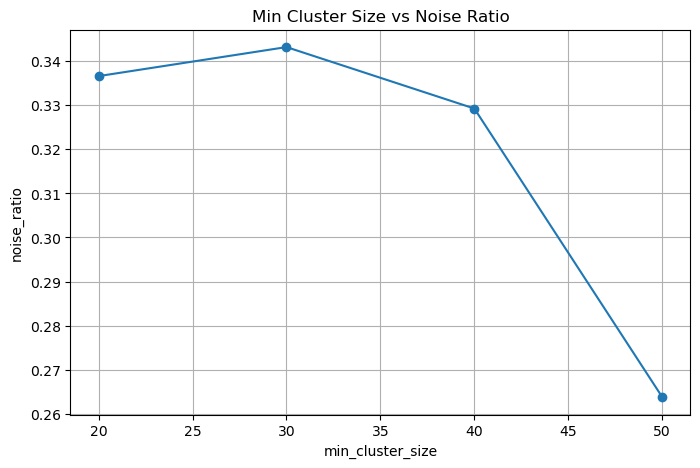

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(tuning_summary['min_cluster_size'], tuning_summary['noise_ratio'], marker='o')
plt.xlabel('min_cluster_size')
plt.ylabel('noise_ratio')
plt.title('Min Cluster Size vs Noise Ratio')
plt.grid(True)
plt.show()

Here too, the models' noise ratio was much around the intial 0.33. However, an inverse trend is observed for the same pipeline of embedding-dimensionality reduction-clustreing models, for the min-cluster size v/s the noise ratio.

The min_cluster size of 50 was chosen as the final cluster_size it had 10 clusters with the least noise ratio


In [7]:
final = pd.read_csv('csvs/final_labeled_pain_points.csv')
final

,comment_text,cluster
0,Can you do something about the filter? Surely ...,8
1,Why are we getting rid of the variants and 4o ...,6
2,GPT has helped me in so many ways. I have auti...,-1
3,Why did you introduce a bunch of usage limits ...,2
4,Why did you deprecate old models while GPT 5 i...,2
...,...,...
2580,I would say no matter how much you want to mov...,9
2581,The thread parent is talking about the em dash...,-1
2582,"Yes, they did release open-source models. Afte...",9
2583,weird that you're judging someone so hard for ...,4


In [8]:
final.groupby(by='cluster')['comment_text'].count()

cluster
-1    682
 0    110
 1     86
 2    928
 3     69
 4     66
 5    225
 6     76
 7     94
 8     69
 9    180
Name: comment_text, dtype: int64

This shows a fair distribution of points across most clusters, except one mega cluster (Cluster 2)

In [9]:
pd.read_csv('csvs/bertopic_summary.csv')

,Topic,Count,Name,Representation,Representative_Docs
0,-1,776,-1_like_model_models_gpt5,"['like', 'model', 'models', 'gpt5', 'just', 'u...",['I have been a ChatGPT plus user for around 2...
1,0,195,0_4o_writing_bring_friend,"['4o', 'writing', 'bring', 'friend', '41', '45...",['I really hope they go back on this decision....
2,1,115,1_ai_people_friend_relationships,"['ai', 'people', 'friend', 'relationships', 'r...",['# They\'re Taking Away What Matters to Us\n\...
3,2,111,2_voice_standard_mode_advanced,"['voice', 'standard', 'mode', 'advanced', 'avm...",['Please bring back 4.1 and standard voice mod...
4,3,99,3_gpt4o_emotional_tone_gpt5,"['gpt4o', 'emotional', 'tone', 'gpt5', 'users'...","['Dear OpenAI Team,\n\nI’m writing as a long-t..."
...,...,...,...,...,...
67,66,5,66_o4mmh_favoured_damaged_costumers,"['o4mmh', 'favoured', 'damaged', 'costumers', ...","[""Gpt-5 non-reasoning just feels like 4o, was ..."
68,67,5,67_man_yes_attachment_heart,"['man', 'yes', 'attachment', 'heart', 'saved',...",['Sam Altman why can’t you be honest and admit...
69,68,5,68_backlash_general_public_hates,"['backlash', 'general', 'public', 'hates', 'un...",['This was not appealing to the general public...
70,69,5,69_reference_study_learn_chat,"['reference', 'study', 'learn', 'chat', 'histo...",['When can we have more than one person in a c...


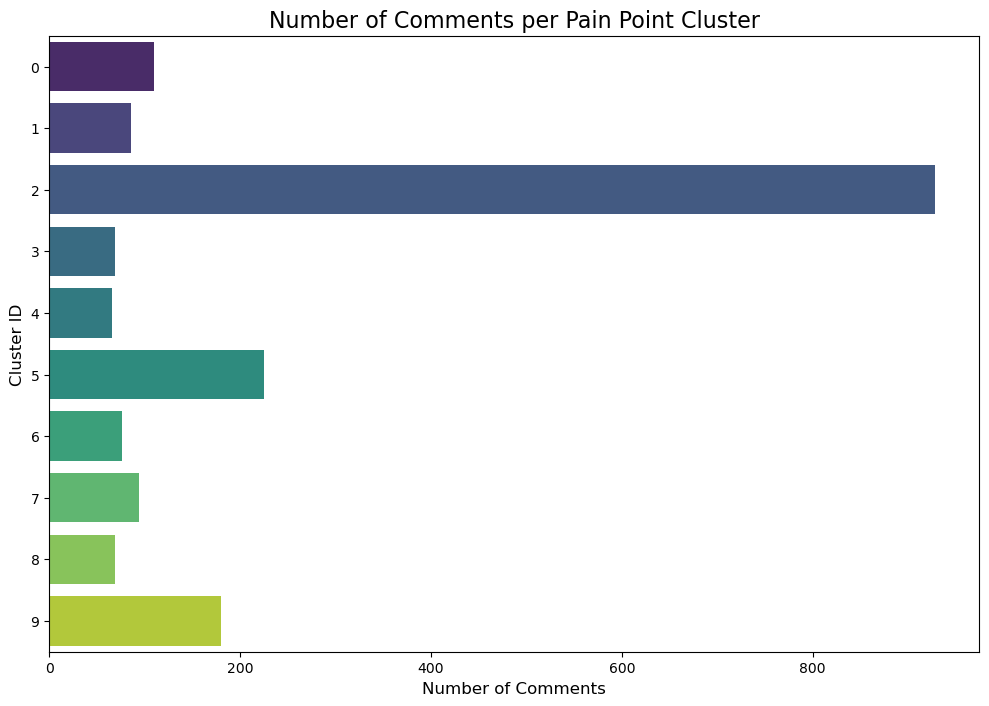

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your final labeled data
df = pd.read_csv('csvs/final_labeled_pain_points.csv')

# Create the bar chart
plt.figure(figsize=(12, 8))
# Get value counts, excluding noise (-1), and sort by count
cluster_counts = df[df['cluster'] != -1]['cluster'].value_counts().sort_values(ascending=True)
sns.barplot(x=cluster_counts.values, y=cluster_counts.index, orient='h', palette='viridis')
plt.title('Number of Comments per Pain Point Cluster', fontsize=16)
plt.xlabel('Number of Comments', fontsize=12)
plt.ylabel('Cluster ID', fontsize=12)
plt.show()

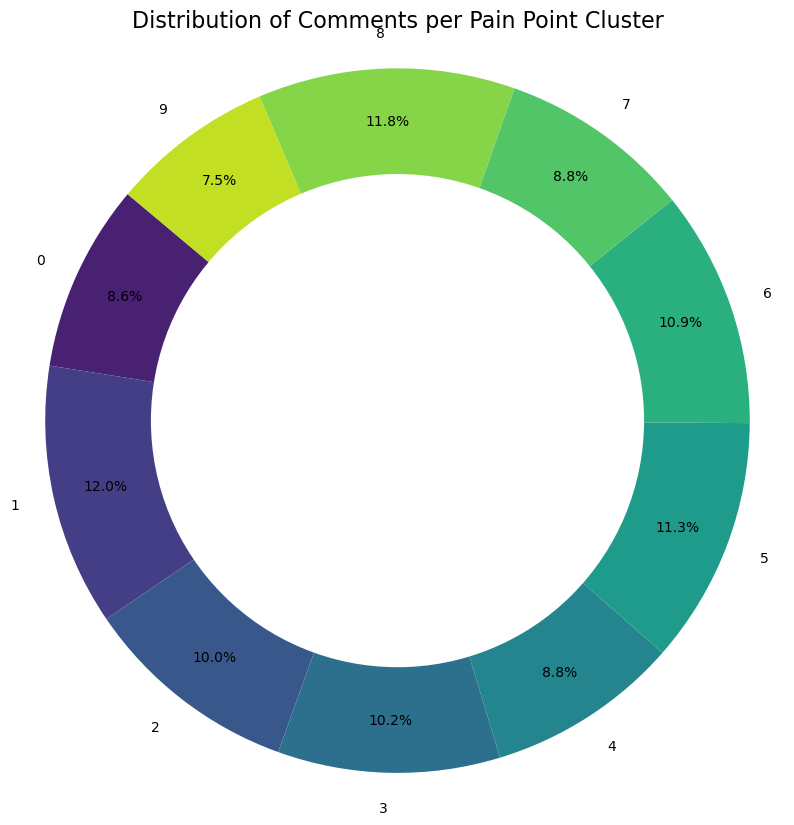

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Assume 'df' is your DataFrame ---
# To make this example runnable, let's create a sample DataFrame
np.random.seed(42)
cluster_assignments = np.random.randint(-1, 10, 500)
df = pd.DataFrame({'cluster': cluster_assignments})
# -----------------------------------------


# 1. Get value counts, excluding noise (-1).
# For a pie chart, sorting by cluster ID (the index) can make it more orderly.
cluster_counts = df[df['cluster'] != -1]['cluster'].value_counts().sort_index()

# 2. Set up the plot figure
plt.figure(figsize=(10, 10))

# 3. Create the pie chart wedges
# We use the same 'viridis' palette for consistency.
colors = sns.color_palette('viridis', len(cluster_counts))
plt.pie(
    x=cluster_counts.values,
    labels=cluster_counts.index,
    colors=colors,
    autopct='%1.1f%%',  # Format to show percentages with one decimal place
    startangle=140,     # Rotate the start of the pie for better label placement
    pctdistance=0.85    # Move the percentage labels inside the wedges
)

# 4. Draw a white circle in the center to create the donut hole
# The first argument is the center (0,0), the second is the radius.
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()  # Get the current figure
fig.gca().add_artist(centre_circle) # Get the current axes and add the circle

# 5. Add final touches for clarity
plt.title('Distribution of Comments per Pain Point Cluster', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


### Topic Modelling


In [6]:
tfidf = pd.read_csv('csvs/tfidf_topic_summary.csv')
tfidf

,cluster_id,num_comments,top_keywords
0,0,110,"voice, standard voice, standard, voice mode, m..."
1,1,86,"gpt, image, model, gpt5, instructions, instruc..."
2,2,928,"4o, gpt, model, models, like, plus, just, user..."
3,3,69,"gpt, model, openai, 4o, models, users, o3, jus..."
4,4,66,"ama, comments, comment, just, like, people, do..."
5,5,225,"context, window, context window, chatgpt, 32k,..."
6,6,76,"chatgpt, like, 4o, just, chat, gpt, want, peop..."
7,7,94,"gpt, 4o, gpt 4o, emotional, model, users, like..."
8,8,69,"sexual, people, like, just, harmful, content, ..."
9,9,180,"ai, people, like, openai, just, safety, don, u..."


Reranking using BerTopic..

In [7]:
bertopic_rr = pd.read_csv('csvs/final_bertopic_reranked_summary.csv')
bertopic_rr

,cluster_id,num_comments,reranked_keywords
0,0,110,"standard voice, 4o 41, voice mode, svm, avm, b..."
1,1,86,"gpt5, gpt, output, code, problem, error, gpt5 ..."
2,2,928,"models, models settings, legacy models, old mo..."
3,3,69,"gpt4o, openai, legacy, gpt5, legacy models, ac..."
4,4,66,"comments, people, response, questions, negativ..."
5,5,225,"window, context window, 32k, use, plus users, ..."
6,6,76,"chatgpt, chat, models, gpt, chat gpt, time, gp..."
7,7,94,"4o, gpt4o, gpt5, support, gpt, choose, connect..."
8,8,69,"chatgpt, research, questions, censorship, age ..."
9,9,180,"people, friend, need, like, emotional, talk, r..."


### Topic modelling from determined keywords

In [9]:
keywords_table = bertopic_rr.merge(tfidf, on='cluster_id')[['cluster_id', 'top_keywords','reranked_keywords']]
keywords_table

,cluster_id,top_keywords,reranked_keywords
0,0,"voice, standard voice, standard, voice mode, m...","standard voice, 4o 41, voice mode, svm, avm, b..."
1,1,"gpt, image, model, gpt5, instructions, instruc...","gpt5, gpt, output, code, problem, error, gpt5 ..."
2,2,"4o, gpt, model, models, like, plus, just, user...","models, models settings, legacy models, old mo..."
3,3,"gpt, model, openai, 4o, models, users, o3, jus...","gpt4o, openai, legacy, gpt5, legacy models, ac..."
4,4,"ama, comments, comment, just, like, people, do...","comments, people, response, questions, negativ..."
5,5,"context, window, context window, chatgpt, 32k,...","window, context window, 32k, use, plus users, ..."
6,6,"chatgpt, like, 4o, just, chat, gpt, want, peop...","chatgpt, chat, models, gpt, chat gpt, time, gp..."
7,7,"gpt, 4o, gpt 4o, emotional, model, users, like...","4o, gpt4o, gpt5, support, gpt, choose, connect..."
8,8,"sexual, people, like, just, harmful, content, ...","chatgpt, research, questions, censorship, age ..."
9,9,"ai, people, like, openai, just, safety, don, u...","people, friend, need, like, emotional, talk, r..."


In [11]:
print(keywords_table.to_markdown())

|    |   cluster_id | top_keywords                                                                                 | reranked_keywords                                                                                                 |
|---:|-------------:|:---------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------|
|  0 |            0 | voice, standard voice, standard, voice mode, mode, avm, advanced, advanced voice, like, just | standard voice, 4o 41, voice mode, svm, avm, bring 41, cancel, service chatbot, model standard, 41 standard       |
|  1 |            1 | gpt, image, model, gpt5, instructions, instruction, 4o, worse, output, promising             | gpt5, gpt, output, code, problem, error, gpt5 review, gpt5 problem, acknowledging error, project instructions     |
|  2 |            2 | 4o, gpt, model, models, like, plus, just, user

In [13]:
ft_kw = pd.read_csv('csvs/flan_t5_res_keyword_summary.csv')
ft_kw

,cluster_id,flan_t5_topic_label,source_keywords
0,0,avm vs.,"voice, standard voice, standard, voice mode, m..."
1,1,image result for gpt5,"gpt, image, model, gpt5, instructions, instruc..."
2,2,mobile phones gpt o,"4o, gpt, model, models, like, plus, just, user..."
3,3,openai gpt 4,"gpt, model, openai, 4o, models, users, o3, jus..."
4,4,don t you just love how people,"ama, comments, comment, just, like, people, do..."
5,5,chatgpt 32 kb,"context, window, context window, chatgpt, 32k,..."
6,6,don just want to chat gp,"chatgpt, like, 4o, just, chat, gpt, want, peop..."
7,7,gpt 4o users just,"gpt, 4o, gpt 4o, emotional, model, users, like..."
8,8,gpt filtering for people,"sexual, people, like, just, harmful, content, ..."
9,9,don t worry about the safety of,"ai, people, like, openai, just, safety, don, u..."


In [14]:
ft_kw_rr = pd.read_csv('csvs/flan_t5_reranked_keyword_summary.csv')
ft_kw_rr

,cluster_id,flan_t5_topic_label,source_keywords
0,0,chatgpt - different voice,"voice, mode, voice mode, standard voice, advan..."
1,1,gpt4o -,"image gen, generation, sora, image generation,..."
2,2,choose model from the dropdown menu to,"models, models settings, legacy models, old mo..."
3,3,openai -lrb,"openai, models, benchmarks, does openai, opena..."
4,4,sam jones ama,"ama, comments, sam, answer questions, jits, an..."
5,5,chatgpt uses 32k of,"window, context window, 32k, use, plus users, ..."
6,6,chatgpt is a free,"chatgpt, models, use, gpt5, work, chat, feels ..."
7,7,choosing the right gpt for,"4o, gpt4o, model, gpt5, emotional, support, gp..."
8,8,chatgpt flagged as harmful,"chatgpt, filter, content, adults, users, harmf..."
9,9,openai samsung,"openai, ai, safety, users, models, trust, open..."


In [15]:
oss_kw = pd.read_csv('csvs/gpt-oss_keyword_summary.csv')
oss_kw

,cluster_id,groq_topic_label,source_keywords
0,0,Voice Mode: Standard vs Advanced,"voice, standard voice, standard, voice mode, m..."
1,1,GPT-5 Image Model Performance,"gpt, image, model, gpt5, instructions, instruc..."
2,2,**Using GPT‑4o Model**,"4o, gpt, model, models, like, plus, just, user..."
3,3,OpenAI GPT‑4o Model,"gpt, model, openai, 4o, models, users, o3, jus..."
4,4,AMA Q&A Session,"ama, comments, comment, just, like, people, do..."
5,5,ChatGPT 32k Context Window,"context, window, context window, chatgpt, 32k,..."
6,6,People Want GPT‑4o Chat Model,"chatgpt, like, 4o, just, chat, gpt, want, peop..."
7,7,GPT‑4o Emotional Tone,"gpt, 4o, gpt 4o, emotional, model, users, like..."
8,8,Sexual Content Filtering in ChatGPT,"sexual, people, like, just, harmful, content, ..."
9,9,AI Safety and User Trust,"ai, people, like, openai, just, safety, don, u..."


In [16]:
oss_kw_rr = pd.read_csv('csvs/gpt-oss_rr_keyword_summary.csv')
oss_kw_rr

,cluster_id,groq_topic_label,source_keywords
0,0,ChatGPT Voice Mode Options,"voice, mode, voice mode, standard voice, advan..."
1,1,Sora Image and Video Generation,"image gen, generation, sora, image generation,..."
2,2,**Model Management and Selection**,"models, models settings, legacy models, old mo..."
3,3,OpenAI Model Transparency Benchmarks,"openai, models, benchmarks, does openai, opena..."
4,4,AMA Answers and Profile Comments,"ama, comments, sam, answer questions, jits, an..."
5,5,ChatGPT Plus 32k Context,"window, context window, 32k, use, plus users, ..."
6,6,ChatGPT as Professional Companion,"chatgpt, models, use, gpt5, work, chat, feels ..."
7,7,Choosing GPT‑4o for Emotional Support,"4o, gpt4o, model, gpt5, emotional, support, gp..."
8,8,ChatGPT Harmful Content Filtering,"chatgpt, filter, content, adults, users, harmf..."
9,9,OpenAI AI Safety & Trust,"openai, ai, safety, users, models, trust, open..."


In [17]:
kimik2_kw = pd.read_csv('csvs/kimik2_keyword_summary.csv')
kimik2_kw

,cluster_id,groq_topic_label,source_keywords
0,0,Advanced Voice Mode,"voice, standard voice, standard, voice mode, m..."
1,1,GPT-4o Output Drop,"gpt, image, model, gpt5, instructions, instruc..."
2,2,GPT Model Comparison,"4o, gpt, model, models, like, plus, just, user..."
3,3,OpenAI GPT-4o Models,"gpt, model, openai, 4o, models, users, o3, jus..."
4,4,AMA Comments,"ama, comments, comment, just, like, people, do..."
5,5,ChatGPT Context Window Expansion,"context, window, context window, chatgpt, 32k,..."
6,6,ChatGPT 4o Feedback,"chatgpt, like, 4o, just, chat, gpt, want, peop..."
7,7,GPT-4o Tone,"gpt, 4o, gpt 4o, emotional, model, users, like..."
8,8,Harmful Sexual Content Filtering,"sexual, people, like, just, harmful, content, ..."
9,9,AI Safety Concerns,"ai, people, like, openai, just, safety, don, u..."


In [18]:
kimik2_kw_rr = pd.read_csv('csvs/kimik2_keyword_summary_rr.csv')
kimik2_kw_rr

,cluster_id,groq_topic_label,source_keywords
0,0,Voice Mode Options,"voice, mode, voice mode, standard voice, advan..."
1,1,AI Image & Video Creation,"image gen, generation, sora, image generation,..."
2,2,Model picker removal,"models, models settings, legacy models, old mo..."
3,3,OpenAI Model Transparency,"openai, models, benchmarks, does openai, opena..."
4,4,AMA Profiles & Comments,"ama, comments, sam, answer questions, jits, an..."
5,5,ChatGPT 32K Context Window,"window, context window, 32k, use, plus users, ..."
6,6,Pro ChatGPT Experience,"chatgpt, models, use, gpt5, work, chat, feels ..."
7,7,Emotional GPT-4o Experience,"4o, gpt4o, model, gpt5, emotional, support, gp..."
8,8,Adult Content Filtering,"chatgpt, filter, content, adults, users, harmf..."
9,9,OpenAI User Trust,"openai, ai, safety, users, models, trust, open..."


In [19]:
llama_kw = pd.read_csv('csvs/llama4Maverick_keyword_summary.csv')
llama_kw

,cluster_id,groq_topic_label,source_keywords
0,0,"Advanced Voice Mode is a suitable label, but i...","voice, standard voice, standard, voice mode, m..."
1,1,GPT Model Image Output Quality,"gpt, image, model, gpt5, instructions, instruc..."
2,2,GPT Model Comparison,"4o, gpt, model, models, like, plus, just, user..."
3,3,GPT-4o Model by OpenAI,"gpt, model, openai, 4o, models, users, o3, jus..."
4,4,"User Comments and Responses \n\nAlternatively,...","ama, comments, comment, just, like, people, do..."
5,5,ChatGPT Context Window Expansion,"context, window, context window, chatgpt, 32k,..."
6,6,ChatGPT User Experience and Opinions is a bit ...,"chatgpt, like, 4o, just, chat, gpt, want, peop..."
7,7,GPT4o Emotional Tone User Experience,"gpt, 4o, gpt 4o, emotional, model, users, like..."
8,8,Harmful Sexual Content Filtering,"sexual, people, like, just, harmful, content, ..."
9,9,AI Safety Concerns for Users,"ai, people, like, openai, just, safety, don, u..."


In [20]:
llama_kw_rr = pd.read_csv('csvs/llama4Maverick_keyword_summary.csv')
llama_kw_rr

,cluster_id,groq_topic_label,source_keywords
0,0,"Advanced Voice Mode is a suitable label, but i...","voice, standard voice, standard, voice mode, m..."
1,1,GPT Model Image Output Quality,"gpt, image, model, gpt5, instructions, instruc..."
2,2,GPT Model Comparison,"4o, gpt, model, models, like, plus, just, user..."
3,3,GPT-4o Model by OpenAI,"gpt, model, openai, 4o, models, users, o3, jus..."
4,4,"User Comments and Responses \n\nAlternatively,...","ama, comments, comment, just, like, people, do..."
5,5,ChatGPT Context Window Expansion,"context, window, context window, chatgpt, 32k,..."
6,6,ChatGPT User Experience and Opinions is a bit ...,"chatgpt, like, 4o, just, chat, gpt, want, peop..."
7,7,GPT4o Emotional Tone User Experience,"gpt, 4o, gpt 4o, emotional, model, users, like..."
8,8,Harmful Sexual Content Filtering,"sexual, people, like, just, harmful, content, ..."
9,9,AI Safety Concerns for Users,"ai, people, like, openai, just, safety, don, u..."


### Topic Modelling from sample comments out of each cluster


In [21]:
oss_topic =pd.read_csv('csvs/gpt-oss_topic_summary.csv')
oss_topic

,cluster_id,llm_topic_label,num_comments
0,0,Loss of Preferred Standard Voice Mode,110
1,1,Unmet expectations and degraded performance,86
2,2,Restore GPT‑4o model option,928
3,3,Removed models break workflow continuity,69
4,4,Ignored feedback and perceived censorship,66
5,5,Limited context window size,225
6,6,Missing legacy model options,76
7,7,Forced Model Switch Removes Empathy,94
8,8,Excessive censorship hindering legitimate use,69
9,9,**Trust and transparency issues**,180


In [22]:
llama_topic =pd.read_csv('csvs/llama4-maverick_topic_summary.csv')
llama_topic

,cluster_id,llm_topic_label,num_comments
0,0,Retain Standard Voice Mode,110
1,1,"Poor Performance in GPT-5\n\nAlternatively, ot...",86
2,2,Removal of GPT-4o model,928
3,3,Remove Model Choice,69
4,4,Perceived Censorship and Moderation Issues \n\...,66
5,5,Context Window Limitation Frustration\n\nThis ...,225
6,6,Loss of Preferred Model,76
7,7,Loss of GPT-4o Option,94
8,8,Overly Strict Content Censorship,69
9,9,AI Safety and Ethics,180


### Creating Master DF

In [23]:

# Merge osstopic# Add actual topic labels from llama_topic and oss_topic to merged_df
merged_df = ft_kw[['cluster_id', 'source_keywords']]

merged_df = merged_df.merge(
    ft_kw[['cluster_id', 'flan_t5_topic_label']],
    on='cluster_id',
    how='left'
)

merged_df = merged_df.merge(
    oss_kw[['cluster_id', 'groq_topic_label']],
    on='cluster_id',
    how='left'
)

print(merged_df.columns)


merged_df = merged_df.rename(columns={
    'groq_topic_label':'oss_topic_label'
})
print(merged_df.columns)



# Merge osstopic
merged_df = merged_df.merge(
    kimik2_kw[['cluster_id', 'groq_topic_label']],
    on='cluster_id',
    how='left'
)
merged_df = merged_df.rename(columns = {
    'groq_topic_label':'kimik2_topic_label'
})


# Merge osstopic
merged_df = merged_df.merge(
    llama_kw[['cluster_id', 'groq_topic_label']],
    on='cluster_id',
    how='left'
)
merged_df =merged_df.rename(columns = {
    'groq_topic_label':'llama4_topic_label'
})

# Merge llama_topic
merged_df = merged_df.merge(
    llama_topic[['cluster_id', 'llm_topic_label']],
    on='cluster_id',
    how='left'
)

oss_topic = oss_topic.rename(columns={
    'llm_topic_label': 'oss_sum_topic'
})

# Merge oss_topic
merged_df = merged_df.merge(
    oss_topic[['cluster_id', 'oss_sum_topic']],
    on='cluster_id',
    how='left'
)

# # Rename columns for clarity
# merged_df = merged_df.rename(columns={
#     'llm_topic_label': 'llama_sum_topic',
#     # 'oss_topic_label': 'oss_sum_topic',
#     'flan_t5_topic_label':'Source Keywords',
#     'source_keywords':'flan_t5_large_topic_labels'
# })


Index(['cluster_id', 'source_keywords', 'flan_t5_topic_label',
       'groq_topic_label'],
      dtype='object')
Index(['cluster_id', 'source_keywords', 'flan_t5_topic_label',
       'oss_topic_label'],
      dtype='object')


In [24]:
merged_df

,cluster_id,source_keywords,flan_t5_topic_label,oss_topic_label,kimik2_topic_label,llama4_topic_label,llm_topic_label,oss_sum_topic
0,0,"voice, standard voice, standard, voice mode, m...",avm vs.,Voice Mode: Standard vs Advanced,Advanced Voice Mode,"Advanced Voice Mode is a suitable label, but i...",Retain Standard Voice Mode,Loss of Preferred Standard Voice Mode
1,1,"gpt, image, model, gpt5, instructions, instruc...",image result for gpt5,GPT-5 Image Model Performance,GPT-4o Output Drop,GPT Model Image Output Quality,"Poor Performance in GPT-5\n\nAlternatively, ot...",Unmet expectations and degraded performance
2,2,"4o, gpt, model, models, like, plus, just, user...",mobile phones gpt o,**Using GPT‑4o Model**,GPT Model Comparison,GPT Model Comparison,Removal of GPT-4o model,Restore GPT‑4o model option
3,3,"gpt, model, openai, 4o, models, users, o3, jus...",openai gpt 4,OpenAI GPT‑4o Model,OpenAI GPT-4o Models,GPT-4o Model by OpenAI,Remove Model Choice,Removed models break workflow continuity
4,4,"ama, comments, comment, just, like, people, do...",don t you just love how people,AMA Q&A Session,AMA Comments,"User Comments and Responses \n\nAlternatively,...",Perceived Censorship and Moderation Issues \n\...,Ignored feedback and perceived censorship
5,5,"context, window, context window, chatgpt, 32k,...",chatgpt 32 kb,ChatGPT 32k Context Window,ChatGPT Context Window Expansion,ChatGPT Context Window Expansion,Context Window Limitation Frustration\n\nThis ...,Limited context window size
6,6,"chatgpt, like, 4o, just, chat, gpt, want, peop...",don just want to chat gp,People Want GPT‑4o Chat Model,ChatGPT 4o Feedback,ChatGPT User Experience and Opinions is a bit ...,Loss of Preferred Model,Missing legacy model options
7,7,"gpt, 4o, gpt 4o, emotional, model, users, like...",gpt 4o users just,GPT‑4o Emotional Tone,GPT-4o Tone,GPT4o Emotional Tone User Experience,Loss of GPT-4o Option,Forced Model Switch Removes Empathy
8,8,"sexual, people, like, just, harmful, content, ...",gpt filtering for people,Sexual Content Filtering in ChatGPT,Harmful Sexual Content Filtering,Harmful Sexual Content Filtering,Overly Strict Content Censorship,Excessive censorship hindering legitimate use
9,9,"ai, people, like, openai, just, safety, don, u...",don t worry about the safety of,AI Safety and User Trust,AI Safety Concerns,AI Safety Concerns for Users,AI Safety and Ethics,**Trust and transparency issues**


In [25]:

# Merge osstopic# Add actual topic labels from llama_topic and oss_topic to merged_df
merged_df_rr = ft_kw_rr[['cluster_id', 'source_keywords']]

merged_df_rr = merged_df_rr.merge(
    ft_kw_rr[['cluster_id', 'flan_t5_topic_label']],
    on='cluster_id',
    how='left'
)

merged_df_rr = merged_df_rr.rename(columns={
    'flan_t5_topic_label':'flan_t5_topic_label_rr'
})
print(merged_df_rr.columns)

merged_df_rr = merged_df_rr.merge(
    oss_kw_rr[['cluster_id', 'groq_topic_label']],
    on='cluster_id',
    how='left'
)

# print(merged_df.columns)


merged_df_rr = merged_df_rr.rename(columns={
    'groq_topic_label':'oss_topic_label_rr'
})
print(merged_df_rr.columns)



# Merge osstopic
merged_df_rr = merged_df_rr.merge(
    kimik2_kw_rr[['cluster_id', 'groq_topic_label']],
    on='cluster_id',
    how='left'
)
merged_df_rr = merged_df_rr.rename(columns = {
    'groq_topic_label':'kimik2_topic_label_rr'
})

# Merge osstopic
merged_df_rr = merged_df_rr.merge(
    llama_kw_rr[['cluster_id', 'groq_topic_label']],
    on='cluster_id',
    how='left'
)
merged_df_rr =merged_df_rr.rename(columns = {
    'groq_topic_label':'llama4_topic_label_rr'
})

# Merge llama_topic
merged_df_rr = merged_df_rr.merge(
    llama_topic[['cluster_id', 'llm_topic_label']],
    on='cluster_id',
    how='left'
)

oss_topic = oss_topic.rename(columns={
    'llm_topic_label': 'oss_sum_topic'
})

# Merge oss_topic
merged_df_rr = merged_df_rr.merge(
    oss_topic[['cluster_id', 'oss_sum_topic']],
    on='cluster_id',
    how='left'
)



Index(['cluster_id', 'source_keywords', 'flan_t5_topic_label_rr'], dtype='object')
Index(['cluster_id', 'source_keywords', 'flan_t5_topic_label_rr',
       'oss_topic_label_rr'],
      dtype='object')


In [26]:
merged_df_rr

,cluster_id,source_keywords,flan_t5_topic_label_rr,oss_topic_label_rr,kimik2_topic_label_rr,llama4_topic_label_rr,llm_topic_label,oss_sum_topic
0,0,"voice, mode, voice mode, standard voice, advan...",chatgpt - different voice,ChatGPT Voice Mode Options,Voice Mode Options,"Advanced Voice Mode is a suitable label, but i...",Retain Standard Voice Mode,Loss of Preferred Standard Voice Mode
1,1,"image gen, generation, sora, image generation,...",gpt4o -,Sora Image and Video Generation,AI Image & Video Creation,GPT Model Image Output Quality,"Poor Performance in GPT-5\n\nAlternatively, ot...",Unmet expectations and degraded performance
2,2,"models, models settings, legacy models, old mo...",choose model from the dropdown menu to,**Model Management and Selection**,Model picker removal,GPT Model Comparison,Removal of GPT-4o model,Restore GPT‑4o model option
3,3,"openai, models, benchmarks, does openai, opena...",openai -lrb,OpenAI Model Transparency Benchmarks,OpenAI Model Transparency,GPT-4o Model by OpenAI,Remove Model Choice,Removed models break workflow continuity
4,4,"ama, comments, sam, answer questions, jits, an...",sam jones ama,AMA Answers and Profile Comments,AMA Profiles & Comments,"User Comments and Responses \n\nAlternatively,...",Perceived Censorship and Moderation Issues \n\...,Ignored feedback and perceived censorship
5,5,"window, context window, 32k, use, plus users, ...",chatgpt uses 32k of,ChatGPT Plus 32k Context,ChatGPT 32K Context Window,ChatGPT Context Window Expansion,Context Window Limitation Frustration\n\nThis ...,Limited context window size
6,6,"chatgpt, models, use, gpt5, work, chat, feels ...",chatgpt is a free,ChatGPT as Professional Companion,Pro ChatGPT Experience,ChatGPT User Experience and Opinions is a bit ...,Loss of Preferred Model,Missing legacy model options
7,7,"4o, gpt4o, model, gpt5, emotional, support, gp...",choosing the right gpt for,Choosing GPT‑4o for Emotional Support,Emotional GPT-4o Experience,GPT4o Emotional Tone User Experience,Loss of GPT-4o Option,Forced Model Switch Removes Empathy
8,8,"chatgpt, filter, content, adults, users, harmf...",chatgpt flagged as harmful,ChatGPT Harmful Content Filtering,Adult Content Filtering,Harmful Sexual Content Filtering,Overly Strict Content Censorship,Excessive censorship hindering legitimate use
9,9,"openai, ai, safety, users, models, trust, open...",openai samsung,OpenAI AI Safety & Trust,OpenAI User Trust,AI Safety Concerns for Users,AI Safety and Ethics,**Trust and transparency issues**


In [27]:
# merged_df.to_csv("csvs/final_topic_modelling.csv", index=False)

In [28]:
pd.read_csv("csvs/final_topic_modelling.csv")

,cluster_id,TFIDF Keywords,BERTopic Reranked Keywords,flan_t5_topic_label,flan_t5_topic_label_rr,oss_topic_label,oss_topic_label_rr,kimik2_topic_label,kimik2_topic_label_rr,llama4_topic_label,llama4_topic_label_rr,llama4_sum_topics,oss_sum_topic
0,0,"voice, standard voice, standard, voice mode, m...","voice, mode, voice mode, standard voice, advan...",avm vs.,chatgpt - different voice,Voice Mode: Standard vs Advanced,ChatGPT Voice Mode Options,Advanced Voice Mode,Voice Mode Options,"Advanced Voice Mode is a suitable label, but i...","Advanced Voice Mode is a suitable label, but i...",Retain Standard Voice Mode,Loss of Preferred Standard Voice Mode
1,1,"gpt, image, model, gpt5, instructions, instruc...","image gen, generation, sora, image generation,...",image result for gpt5,gpt4o -,GPT-5 Image Model Performance,Sora Image and Video Generation,GPT-4o Output Drop,AI Image & Video Creation,GPT Model Image Output Quality,GPT Model Image Output Quality,"Poor Performance in GPT-5\n\nAlternatively, ot...",Unmet expectations and degraded performance
2,2,"4o, gpt, model, models, like, plus, just, user...","models, models settings, legacy models, old mo...",mobile phones gpt o,choose model from the dropdown menu to,**Using GPT‑4o Model**,**Model Management and Selection**,GPT Model Comparison,Model picker removal,GPT Model Comparison,GPT Model Comparison,Removal of GPT-4o model,Restore GPT‑4o model option
3,3,"gpt, model, openai, 4o, models, users, o3, jus...","openai, models, benchmarks, does openai, opena...",openai gpt 4,openai -lrb,OpenAI GPT‑4o Model,OpenAI Model Transparency Benchmarks,OpenAI GPT-4o Models,OpenAI Model Transparency,GPT-4o Model by OpenAI,GPT-4o Model by OpenAI,Remove Model Choice,Removed models break workflow continuity
4,4,"ama, comments, comment, just, like, people, do...","ama, comments, sam, answer questions, jits, an...",don t you just love how people,sam jones ama,AMA Q&A Session,AMA Answers and Profile Comments,AMA Comments,AMA Profiles & Comments,"User Comments and Responses \n\nAlternatively,...","User Comments and Responses \n\nAlternatively,...",Perceived Censorship and Moderation Issues \n\...,Ignored feedback and perceived censorship
5,5,"context, window, context window, chatgpt, 32k,...","window, context window, 32k, use, plus users, ...",chatgpt 32 kb,chatgpt uses 32k of,ChatGPT 32k Context Window,ChatGPT Plus 32k Context,ChatGPT Context Window Expansion,ChatGPT 32K Context Window,ChatGPT Context Window Expansion,ChatGPT Context Window Expansion,Context Window Limitation Frustration\n\nThis ...,Limited context window size
6,6,"chatgpt, like, 4o, just, chat, gpt, want, peop...","chatgpt, models, use, gpt5, work, chat, feels ...",don just want to chat gp,chatgpt is a free,People Want GPT‑4o Chat Model,ChatGPT as Professional Companion,ChatGPT 4o Feedback,Pro ChatGPT Experience,ChatGPT User Experience and Opinions is a bit ...,ChatGPT User Experience and Opinions is a bit ...,Loss of Preferred Model,Missing legacy model options
7,7,"gpt, 4o, gpt 4o, emotional, model, users, like...","4o, gpt4o, model, gpt5, emotional, support, gp...",gpt 4o users just,choosing the right gpt for,GPT‑4o Emotional Tone,Choosing GPT‑4o for Emotional Support,GPT-4o Tone,Emotional GPT-4o Experience,GPT4o Emotional Tone User Experience,GPT4o Emotional Tone User Experience,Loss of GPT-4o Option,Forced Model Switch Removes Empathy
8,8,"sexual, people, like, just, harmful, content, ...","chatgpt, filter, content, adults, users, harmf...",gpt filtering for people,chatgpt flagged as harmful,Sexual Content Filtering in ChatGPT,ChatGPT Harmful Content Filtering,Harmful Sexual Content Filtering,Adult Content Filtering,Harmful Sexual Content Filtering,Harmful Sexual Content Filtering,Overly Strict Content Censorship,Excessive censorship hindering legitimate use
9,9,"ai, people, like, openai, just, safety, don, u...","openai, ai, safety, users, models, trust, open...",don t worry about the safety of,openai samsung,AI Safety and User T

In [29]:
pd.read_csv('csvs/final_topic_modelling_rr.csv')

,cluster_id,source_keywords,flan_t5_topic_label_rr,oss_topic_label_rr,kimik2_topic_label_rr,llama4_topic_label,llm_topic_label,oss_sum_topic
0,0,"voice, mode, voice mode, standard voice, advan...",chatgpt - different voice,ChatGPT Voice Mode Options,Voice Mode Options,"Advanced Voice Mode is a suitable label, but i...",Retain Standard Voice Mode,Loss of Preferred Standard Voice Mode
1,1,"image gen, generation, sora, image generation,...",gpt4o -,Sora Image and Video Generation,AI Image & Video Creation,GPT Model Image Output Quality,"Poor Performance in GPT-5\n\nAlternatively, ot...",Unmet expectations and degraded performance
2,2,"models, models settings, legacy models, old mo...",choose model from the dropdown menu to,**Model Management and Selection**,Model picker removal,GPT Model Comparison,Removal of GPT-4o model,Restore GPT‑4o model option
3,3,"openai, models, benchmarks, does openai, opena...",openai -lrb,OpenAI Model Transparency Benchmarks,OpenAI Model Transparency,GPT-4o Model by OpenAI,Remove Model Choice,Removed models break workflow continuity
4,4,"ama, comments, sam, answer questions, jits, an...",sam jones ama,AMA Answers and Profile Comments,AMA Profiles & Comments,"User Comments and Responses \n\nAlternatively,...",Perceived Censorship and Moderation Issues \n\...,Ignored feedback and perceived censorship
5,5,"window, context window, 32k, use, plus users, ...",chatgpt uses 32k of,ChatGPT Plus 32k Context,ChatGPT 32K Context Window,ChatGPT Context Window Expansion,Context Window Limitation Frustration\n\nThis ...,Limited context window size
6,6,"chatgpt, models, use, gpt5, work, chat, feels ...",chatgpt is a free,ChatGPT as Professional Companion,Pro ChatGPT Experience,ChatGPT User Experience and Opinions is a bit ...,Loss of Preferred Model,Missing legacy model options
7,7,"4o, gpt4o, model, gpt5, emotional, support, gp...",choosing the right gpt for,Choosing GPT‑4o for Emotional Support,Emotional GPT-4o Experience,GPT4o Emotional Tone User Experience,Loss of GPT-4o Option,Forced Model Switch Removes Empathy
8,8,"chatgpt, filter, content, adults, users, harmf...",chatgpt flagged as harmful,ChatGPT Harmful Content Filtering,Adult Content Filtering,Harmful Sexual Content Filtering,Overly Strict Content Censorship,Excessive censorship hindering legitimate use
9,9,"openai, ai, safety, users, models, trust, open...",openai samsung,OpenAI AI Safety & Trust,OpenAI User Trust,AI Safety Concerns for Users,AI Safety and Ethics,**Trust and transparency issues**


In [30]:
merged_df_rr.rename(columns={'source_keywords':'source_keywords_rr'},inplace=True)
merged_df_rr

,cluster_id,source_keywords_rr,flan_t5_topic_label_rr,oss_topic_label_rr,kimik2_topic_label_rr,llama4_topic_label_rr,llm_topic_label,oss_sum_topic
0,0,"voice, mode, voice mode, standard voice, advan...",chatgpt - different voice,ChatGPT Voice Mode Options,Voice Mode Options,"Advanced Voice Mode is a suitable label, but i...",Retain Standard Voice Mode,Loss of Preferred Standard Voice Mode
1,1,"image gen, generation, sora, image generation,...",gpt4o -,Sora Image and Video Generation,AI Image & Video Creation,GPT Model Image Output Quality,"Poor Performance in GPT-5\n\nAlternatively, ot...",Unmet expectations and degraded performance
2,2,"models, models settings, legacy models, old mo...",choose model from the dropdown menu to,**Model Management and Selection**,Model picker removal,GPT Model Comparison,Removal of GPT-4o model,Restore GPT‑4o model option
3,3,"openai, models, benchmarks, does openai, opena...",openai -lrb,OpenAI Model Transparency Benchmarks,OpenAI Model Transparency,GPT-4o Model by OpenAI,Remove Model Choice,Removed models break workflow continuity
4,4,"ama, comments, sam, answer questions, jits, an...",sam jones ama,AMA Answers and Profile Comments,AMA Profiles & Comments,"User Comments and Responses \n\nAlternatively,...",Perceived Censorship and Moderation Issues \n\...,Ignored feedback and perceived censorship
5,5,"window, context window, 32k, use, plus users, ...",chatgpt uses 32k of,ChatGPT Plus 32k Context,ChatGPT 32K Context Window,ChatGPT Context Window Expansion,Context Window Limitation Frustration\n\nThis ...,Limited context window size
6,6,"chatgpt, models, use, gpt5, work, chat, feels ...",chatgpt is a free,ChatGPT as Professional Companion,Pro ChatGPT Experience,ChatGPT User Experience and Opinions is a bit ...,Loss of Preferred Model,Missing legacy model options
7,7,"4o, gpt4o, model, gpt5, emotional, support, gp...",choosing the right gpt for,Choosing GPT‑4o for Emotional Support,Emotional GPT-4o Experience,GPT4o Emotional Tone User Experience,Loss of GPT-4o Option,Forced Model Switch Removes Empathy
8,8,"chatgpt, filter, content, adults, users, harmf...",chatgpt flagged as harmful,ChatGPT Harmful Content Filtering,Adult Content Filtering,Harmful Sexual Content Filtering,Overly Strict Content Censorship,Excessive censorship hindering legitimate use
9,9,"openai, ai, safety, users, models, trust, open...",openai samsung,OpenAI AI Safety & Trust,OpenAI User Trust,AI Safety Concerns for Users,AI Safety and Ethics,**Trust and transparency issues**


In [31]:
final_topic_modelling = merged_df.merge(
    merged_df_rr[['cluster_id','source_keywords_rr'	,'flan_t5_topic_label_rr','oss_topic_label_rr','kimik2_topic_label_rr','llama4_topic_label_rr']],
    on='cluster_id',
    how='left'
)


final_topic_modelling

,cluster_id,source_keywords,flan_t5_topic_label,oss_topic_label,kimik2_topic_label,llama4_topic_label,llm_topic_label,oss_sum_topic,source_keywords_rr,flan_t5_topic_label_rr,oss_topic_label_rr,kimik2_topic_label_rr,llama4_topic_label_rr
0,0,"voice, standard voice, standard, voice mode, m...",avm vs.,Voice Mode: Standard vs Advanced,Advanced Voice Mode,"Advanced Voice Mode is a suitable label, but i...",Retain Standard Voice Mode,Loss of Preferred Standard Voice Mode,"voice, mode, voice mode, standard voice, advan...",chatgpt - different voice,ChatGPT Voice Mode Options,Voice Mode Options,"Advanced Voice Mode is a suitable label, but i..."
1,1,"gpt, image, model, gpt5, instructions, instruc...",image result for gpt5,GPT-5 Image Model Performance,GPT-4o Output Drop,GPT Model Image Output Quality,"Poor Performance in GPT-5\n\nAlternatively, ot...",Unmet expectations and degraded performance,"image gen, generation, sora, image generation,...",gpt4o -,Sora Image and Video Generation,AI Image & Video Creation,GPT Model Image Output Quality
2,2,"4o, gpt, model, models, like, plus, just, user...",mobile phones gpt o,**Using GPT‑4o Model**,GPT Model Comparison,GPT Model Comparison,Removal of GPT-4o model,Restore GPT‑4o model option,"models, models settings, legacy models, old mo...",choose model from the dropdown menu to,**Model Management and Selection**,Model picker removal,GPT Model Comparison
3,3,"gpt, model, openai, 4o, models, users, o3, jus...",openai gpt 4,OpenAI GPT‑4o Model,OpenAI GPT-4o Models,GPT-4o Model by OpenAI,Remove Model Choice,Removed models break workflow continuity,"openai, models, benchmarks, does openai, opena...",openai -lrb,OpenAI Model Transparency Benchmarks,OpenAI Model Transparency,GPT-4o Model by OpenAI
4,4,"ama, comments, comment, just, like, people, do...",don t you just love how people,AMA Q&A Session,AMA Comments,"User Comments and Responses \n\nAlternatively,...",Perceived Censorship and Moderation Issues \n\...,Ignored feedback and perceived censorship,"ama, comments, sam, answer questions, jits, an...",sam jones ama,AMA Answers and Profile Comments,AMA Profiles & Comments,"User Comments and Responses \n\nAlternatively,..."
5,5,"context, window, context window, chatgpt, 32k,...",chatgpt 32 kb,ChatGPT 32k Context Window,ChatGPT Context Window Expansion,ChatGPT Context Window Expansion,Context Window Limitation Frustration\n\nThis ...,Limited context window size,"window, context window, 32k, use, plus users, ...",chatgpt uses 32k of,ChatGPT Plus 32k Context,ChatGPT 32K Context Window,ChatGPT Context Window Expansion
6,6,"chatgpt, like, 4o, just, chat, gpt, want, peop...",don just want to chat gp,People Want GPT‑4o Chat Model,ChatGPT 4o Feedback,ChatGPT User Experience and Opinions is a bit ...,Loss of Preferred Model,Missing legacy model options,"chatgpt, models, use, gpt5, work, chat, feels ...",chatgpt is a free,ChatGPT as Professional Companion,Pro ChatGPT Experience,ChatGPT User Experience and Opinions is a bit ...
7,7,"gpt, 4o, gpt 4o, emotional, model, users, like...",gpt 4o users just,GPT‑4o Emotional Tone,GPT-4o Tone,GPT4o Emotional Tone User Experience,Loss of GPT-4o Option,Forced Model Switch Removes Empathy,"4o, gpt4o, model, gpt5, emotional, support, gp...",choosing the right gpt for,Choosing GPT‑4o for Emotional Support,Emotional GPT-4o Experience,GPT4o Emotional Tone User Experience
8,8,"sexual, people, like, just, harmful, content, ...",gpt filtering for people,Sexual Content Filtering in ChatGPT,Harmful Sexual Content Filtering,Harmful Sexual Content Filtering,Overly Strict Content Censorship,Excessive censorship hindering legitimate use,"chatgpt, filter, content, adults, users, harmf...",chatgpt flagged as harmful,ChatGPT Harmful Content Filtering,Adult Content Filtering,Harmful Sexual Content Filtering
9,9,"ai, people, like, openai, just, safety, don, u...",don t worry about the safety of,AI Safety and User Trust,AI Safety Concerns,AI Safety Concerns for Users,AI Safety and Ethics,**

In [36]:
final_topic_modelling.rename(columns=
    {
        'source_keywords':'TFIDF Keywords',
        'source_keywords_rr':'BERTopic Reranked Keywords',
        'llm_topic_label':'llama4_sum_topics'
    }, inplace=True
)

print(f"Final Columns - {final_topic_modelling.columns}")

final_column_order = ['cluster_id', 'TFIDF Keywords', 'BERTopic Reranked Keywords', 
                    'flan_t5_topic_label','flan_t5_topic_label_rr','oss_topic_label','oss_topic_label_rr','kimik2_topic_label','kimik2_topic_label_rr','llama4_topic_label','llama4_topic_label_rr' ,
                    'llama4_sum_topics', 'oss_sum_topic'
                    ]

final_topic_modelling = final_topic_modelling[final_column_order]

final_topic_modelling


Final Columns - Index(['cluster_id', 'TFIDF Keywords', 'flan_t5_topic_label',
       'oss_topic_label', 'kimik2_topic_label', 'llama4_topic_label',
       'llama4_sum_topics', 'oss_sum_topic', 'BERTopic Reranked Keywords',
       'flan_t5_topic_label_rr', 'oss_topic_label_rr', 'kimik2_topic_label_rr',
       'llama4_topic_label_rr'],
      dtype='object')


,cluster_id,TFIDF Keywords,BERTopic Reranked Keywords,flan_t5_topic_label,flan_t5_topic_label_rr,oss_topic_label,oss_topic_label_rr,kimik2_topic_label,kimik2_topic_label_rr,llama4_topic_label,llama4_topic_label_rr,llama4_sum_topics,oss_sum_topic
0,0,"voice, standard voice, standard, voice mode, m...","voice, mode, voice mode, standard voice, advan...",avm vs.,chatgpt - different voice,Voice Mode: Standard vs Advanced,ChatGPT Voice Mode Options,Advanced Voice Mode,Voice Mode Options,"Advanced Voice Mode is a suitable label, but i...","Advanced Voice Mode is a suitable label, but i...",Retain Standard Voice Mode,Loss of Preferred Standard Voice Mode
1,1,"gpt, image, model, gpt5, instructions, instruc...","image gen, generation, sora, image generation,...",image result for gpt5,gpt4o -,GPT-5 Image Model Performance,Sora Image and Video Generation,GPT-4o Output Drop,AI Image & Video Creation,GPT Model Image Output Quality,GPT Model Image Output Quality,"Poor Performance in GPT-5\n\nAlternatively, ot...",Unmet expectations and degraded performance
2,2,"4o, gpt, model, models, like, plus, just, user...","models, models settings, legacy models, old mo...",mobile phones gpt o,choose model from the dropdown menu to,**Using GPT‑4o Model**,**Model Management and Selection**,GPT Model Comparison,Model picker removal,GPT Model Comparison,GPT Model Comparison,Removal of GPT-4o model,Restore GPT‑4o model option
3,3,"gpt, model, openai, 4o, models, users, o3, jus...","openai, models, benchmarks, does openai, opena...",openai gpt 4,openai -lrb,OpenAI GPT‑4o Model,OpenAI Model Transparency Benchmarks,OpenAI GPT-4o Models,OpenAI Model Transparency,GPT-4o Model by OpenAI,GPT-4o Model by OpenAI,Remove Model Choice,Removed models break workflow continuity
4,4,"ama, comments, comment, just, like, people, do...","ama, comments, sam, answer questions, jits, an...",don t you just love how people,sam jones ama,AMA Q&A Session,AMA Answers and Profile Comments,AMA Comments,AMA Profiles & Comments,"User Comments and Responses \n\nAlternatively,...","User Comments and Responses \n\nAlternatively,...",Perceived Censorship and Moderation Issues \n\...,Ignored feedback and perceived censorship
5,5,"context, window, context window, chatgpt, 32k,...","window, context window, 32k, use, plus users, ...",chatgpt 32 kb,chatgpt uses 32k of,ChatGPT 32k Context Window,ChatGPT Plus 32k Context,ChatGPT Context Window Expansion,ChatGPT 32K Context Window,ChatGPT Context Window Expansion,ChatGPT Context Window Expansion,Context Window Limitation Frustration\n\nThis ...,Limited context window size
6,6,"chatgpt, like, 4o, just, chat, gpt, want, peop...","chatgpt, models, use, gpt5, work, chat, feels ...",don just want to chat gp,chatgpt is a free,People Want GPT‑4o Chat Model,ChatGPT as Professional Companion,ChatGPT 4o Feedback,Pro ChatGPT Experience,ChatGPT User Experience and Opinions is a bit ...,ChatGPT User Experience and Opinions is a bit ...,Loss of Preferred Model,Missing legacy model options
7,7,"gpt, 4o, gpt 4o, emotional, model, users, like...","4o, gpt4o, model, gpt5, emotional, support, gp...",gpt 4o users just,choosing the right gpt for,GPT‑4o Emotional Tone,Choosing GPT‑4o for Emotional Support,GPT-4o Tone,Emotional GPT-4o Experience,GPT4o Emotional Tone User Experience,GPT4o Emotional Tone User Experience,Loss of GPT-4o Option,Forced Model Switch Removes Empathy
8,8,"sexual, people, like, just, harmful, content, ...","chatgpt, filter, content, adults, users, harmf...",gpt filtering for people,chatgpt flagged as harmful,Sexual Content Filtering in ChatGPT,ChatGPT Harmful Content Filtering,Harmful Sexual Content Filtering,Adult Content Filtering,Harmful Sexual Content Filtering,Harmful Sexual Content Filtering,Overly Strict Content Censorship,Excessive censorship hindering legitimate use
9,9,"ai, people, like, openai, just, safety, don, u...","openai, ai, safety, users, models, trust, open...",don t worry about the safety of,openai samsung,AI Safety and User T

In [ ]:
# final_topic_modelling.to_csv('csvs/final_topic_modelling.csv', index=False)

In [33]:
pd.read_csv('csvs/final_topic_modelling.csv')

,cluster_id,TFIDF Keywords,BERTopic Reranked Keywords,flan_t5_topic_label,flan_t5_topic_label_rr,oss_topic_label,oss_topic_label_rr,kimik2_topic_label,kimik2_topic_label_rr,llama4_topic_label,llama4_topic_label_rr,llama4_sum_topics,oss_sum_topic
0,0,"voice, standard voice, standard, voice mode, m...","voice, mode, voice mode, standard voice, advan...",avm vs.,chatgpt - different voice,Voice Mode: Standard vs Advanced,ChatGPT Voice Mode Options,Advanced Voice Mode,Voice Mode Options,"Advanced Voice Mode is a suitable label, but i...","Advanced Voice Mode is a suitable label, but i...",Retain Standard Voice Mode,Loss of Preferred Standard Voice Mode
1,1,"gpt, image, model, gpt5, instructions, instruc...","image gen, generation, sora, image generation,...",image result for gpt5,gpt4o -,GPT-5 Image Model Performance,Sora Image and Video Generation,GPT-4o Output Drop,AI Image & Video Creation,GPT Model Image Output Quality,GPT Model Image Output Quality,"Poor Performance in GPT-5\n\nAlternatively, ot...",Unmet expectations and degraded performance
2,2,"4o, gpt, model, models, like, plus, just, user...","models, models settings, legacy models, old mo...",mobile phones gpt o,choose model from the dropdown menu to,**Using GPT‑4o Model**,**Model Management and Selection**,GPT Model Comparison,Model picker removal,GPT Model Comparison,GPT Model Comparison,Removal of GPT-4o model,Restore GPT‑4o model option
3,3,"gpt, model, openai, 4o, models, users, o3, jus...","openai, models, benchmarks, does openai, opena...",openai gpt 4,openai -lrb,OpenAI GPT‑4o Model,OpenAI Model Transparency Benchmarks,OpenAI GPT-4o Models,OpenAI Model Transparency,GPT-4o Model by OpenAI,GPT-4o Model by OpenAI,Remove Model Choice,Removed models break workflow continuity
4,4,"ama, comments, comment, just, like, people, do...","ama, comments, sam, answer questions, jits, an...",don t you just love how people,sam jones ama,AMA Q&A Session,AMA Answers and Profile Comments,AMA Comments,AMA Profiles & Comments,"User Comments and Responses \n\nAlternatively,...","User Comments and Responses \n\nAlternatively,...",Perceived Censorship and Moderation Issues \n\...,Ignored feedback and perceived censorship
5,5,"context, window, context window, chatgpt, 32k,...","window, context window, 32k, use, plus users, ...",chatgpt 32 kb,chatgpt uses 32k of,ChatGPT 32k Context Window,ChatGPT Plus 32k Context,ChatGPT Context Window Expansion,ChatGPT 32K Context Window,ChatGPT Context Window Expansion,ChatGPT Context Window Expansion,Context Window Limitation Frustration\n\nThis ...,Limited context window size
6,6,"chatgpt, like, 4o, just, chat, gpt, want, peop...","chatgpt, models, use, gpt5, work, chat, feels ...",don just want to chat gp,chatgpt is a free,People Want GPT‑4o Chat Model,ChatGPT as Professional Companion,ChatGPT 4o Feedback,Pro ChatGPT Experience,ChatGPT User Experience and Opinions is a bit ...,ChatGPT User Experience and Opinions is a bit ...,Loss of Preferred Model,Missing legacy model options
7,7,"gpt, 4o, gpt 4o, emotional, model, users, like...","4o, gpt4o, model, gpt5, emotional, support, gp...",gpt 4o users just,choosing the right gpt for,GPT‑4o Emotional Tone,Choosing GPT‑4o for Emotional Support,GPT-4o Tone,Emotional GPT-4o Experience,GPT4o Emotional Tone User Experience,GPT4o Emotional Tone User Experience,Loss of GPT-4o Option,Forced Model Switch Removes Empathy
8,8,"sexual, people, like, just, harmful, content, ...","chatgpt, filter, content, adults, users, harmf...",gpt filtering for people,chatgpt flagged as harmful,Sexual Content Filtering in ChatGPT,ChatGPT Harmful Content Filtering,Harmful Sexual Content Filtering,Adult Content Filtering,Harmful Sexual Content Filtering,Harmful Sexual Content Filtering,Overly Strict Content Censorship,Excessive censorship hindering legitimate use
9,9,"ai, people, like, openai, just, safety, don, u...","openai, ai, safety, users, models, trust, open...",don t worry about the safety of,openai samsung,AI Safety and User T